# <font color= black> Data Preparation </font> 
###  <font color= black> Write a python program to merge data from each month into one CSV and read in updated dataframe. </font>



####  <font color= brown> Importing libraries </font> 

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd 
import glob
import seaborn as sns
import matplotlib.pyplot as plt

####  <font color= brown> Using glob function to sort all the files which has  name 'Sales' </font> 

In [2]:
csv_files = sorted(glob.glob("Sales*"))
csv_files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

####  <font color= brown> Merging each files </font> 

In [3]:
mergeFiles = pd.concat(pd.read_csv(fileName) for fileName in csv_files)

mergeFiles.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


####  <font color= brown> Removing 'Unnamed' columns from the dataframe </font> 

In [4]:
# mergeFiles
# #Checking if there is columns name 'Unnamed'
# mergeFiles.columns.str.match("Unnamed")

# #Selecting only those data from dataframe except 'Unnamed' column.
# UnamedRemoved = mergeFiles.loc[:,~mergeFiles.columns.str.match("Unnamed")]
# UnamedRemoved

####  <font color= brown>  Merging Files into one CSV File </font> 

In [5]:
#merging data into particular csv file
mergeFiles.to_csv('Total_Data_of_Sales_in_2019.csv', index=False)

####  <font color= brown>  Reading the Merged File </font> 

In [6]:
#reading merged csv file
df = pd.read_csv('Total_Data_of_Sales_in_2019.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


###  <font color= black> Write a python program to remove the NaN missing values from updated dataframe.  </font>

####  <font color= brown> Using dropna() function </font> 

In [7]:
#using dropna() function to remove the NaN values
newdf = df.dropna()
newdf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


###  <font color= black> Write a python program to convert Quantity Ordered and Price Each to numeric.  </font>

#####  <font size = 2 color = black> NOTE: Before converting values of columns 'Quantity Ordered' and 'Price Each' into numeric values we need to make sure that there are only numbers in each columns. If there are any words or letters we need to remove from each columns. </font>

####  <font color= brown> Checking if any words or letters is present in 'Quantity Ordered' Column </font> 

In [8]:
newdf['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

####  <font color= brown> Removing 'Quantity Ordered' as values from the column </font> 

In [10]:
newdf = newdf[newdf['Quantity Ordered'] != 'Quantity Ordered']
newdf.drop(newdf[newdf['Quantity Ordered'] == 'Quantity Ordered'].index, inplace=True)


####  <font color= brown> Words or text 'Quantity Ordered' as values from the column 'Quantity Ordered' has been removed </font> 

In [11]:
newdf['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

####  <font color= brown> Checking if any words or letters present in 'Price Each' Column </font> 

In [12]:
newdf['Price Each'].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

####  <font color= brown> Converting the values of 'Quantity Ordered' and 'Price Each' into numeric </font> 

####  <font color= brown> Before Conversion </font> 

In [13]:
newdf['Quantity Ordered'].unique().dtype

dtype('O')

In [14]:
newdf['Price Each'].unique().dtype

dtype('O')

####  <font color= brown> After Conversion </font> 

In [16]:
newdf['Quantity Ordered'] = pd.to_numeric(newdf['Quantity Ordered'])
newdf['Price Each'] = pd.to_numeric(newdf['Price Each'])


In [17]:
newdf['Quantity Ordered'].unique().dtype


dtype('int64')

In [18]:
newdf['Price Each'].unique().dtype

dtype('float64')

###  <font color= black> Create a new column named Month from Ordered Date of updated dataframe and convert it to integer as data type  </font>

In [19]:
newdf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


####  <font color= brown> Format of Order Date </font> 

In [20]:
newdf['Order Date']

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 185950, dtype: object

####  <font color= brown> Extracting month from 'Order Date' and creating new column 'Month' </font> 

In [21]:
newdf['Order Date'] = pd.to_datetime(newdf['Order Date'])
newdf['Month'] = newdf['Order Date'].dt.month
newdf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


####  <font color= brown> Checking the data type of 'Month' Column</font> 

In [22]:
newdf['Month'].unique().dtype

dtype('int64')

In [23]:
newdf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


####  <font color= brown> Extracting City from Purchase Address </font> 

In [41]:
newdf['Purchase Address']

0                    917 1st St, Dallas, TX 75001
2               682 Chestnut St, Boston, MA 02215
3            669 Spruce St, Los Angeles, CA 90001
4            669 Spruce St, Los Angeles, CA 90001
5               333 8th St, Los Angeles, CA 90001
                           ...                   
186845     840 Highland St, Los Angeles, CA 90001
186846    216 Dogwood St, San Francisco, CA 94016
186847       220 12th St, San Francisco, CA 94016
186848     511 Forest St, San Francisco, CA 94016
186849     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 185950, dtype: object

In [24]:
def extract_city(city):
    return city.split(',')[1]

newdf['City'] = newdf['Purchase Address'].apply(extract_city)
newdf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco


# <font color= black> Data Analysis </font> 
###  <font color= black> Write a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of any chosen variable. </font>

####  <font color= brown> Using sum, mean, standard deviation, skewness, kurtosis functions of Python </font> 

In [42]:
def summaryStat(variable):
    data = newdf[variable] 
    sum = data.sum()
    print(f"Sum of {variable}: {sum}")
    
    mean = data.mean()
    print(f"Mean of {variable}: {mean}")
    
    standardDeviation = data.std()
    print(f"Standard Deviation of {variable}: {standardDeviation}")
    
    Skewness = data.skew()
    print(f"Skewness of {variable}: {Skewness}")
    
    Kurtosis = data.kurtosis()
    print(f"Kurtosis of {variable}: {Kurtosis}")
    
stat = summaryStat("Price Each")
stat
    


Sum of Price Each: 34289130.67999999
Mean of Price Each: 184.3997347670135
Standard Deviation of Price Each: 332.7313298840936
Skewness of Price Each: 2.8721487292935257
Kurtosis of Price Each: 9.094568341148197


In [26]:
newdf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco


### Write a Python program to calculate and show correlation of all variables

####  <font color= brown> Using correlation function form python </font> 

In [27]:
corr = newdf.corr()
corr

,Quantity Ordered,Price Each,Month
Quantity Ordered,1.000000,-0.148272,0.000791
Price Each,-0.148272,1.000000,-0.003375
Month,0.000791,-0.003375,1.000000


####  <font color= brown> Showing Correlation in Heat Map </font> 

<AxesSubplot:>

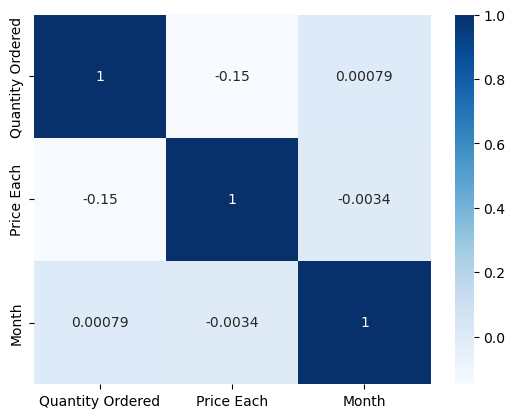

In [28]:
sns.heatmap(data = corr, annot = True, cmap = "Blues")

# Data Exploration

### Which Month has the best sales? and how much was the earning in that month? Make a bar graph of sales as well.


####  <font color= brown> Multiplying Quantity Ordered with Price Each to get Sale </font> 

In [43]:
newdf['Sales'] = newdf['Quantity Ordered'].mul(newdf['Price Each'])
newdf


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco,379.99


####  <font color= brown> Finding out Month with the best sales </font> 

In [46]:
newdfMonth = newdf.groupby(['Month']).sum()
newdfMonth

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [45]:
max_sale = newdfMonth['Sales'].idxmax()
newdf_max_sold_Month = newdfMonth.loc[[max_sale]]
newdf_max_sold_Month

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34


####  <font color= brown> Plotting bar graph  to show earning in that month </font> 

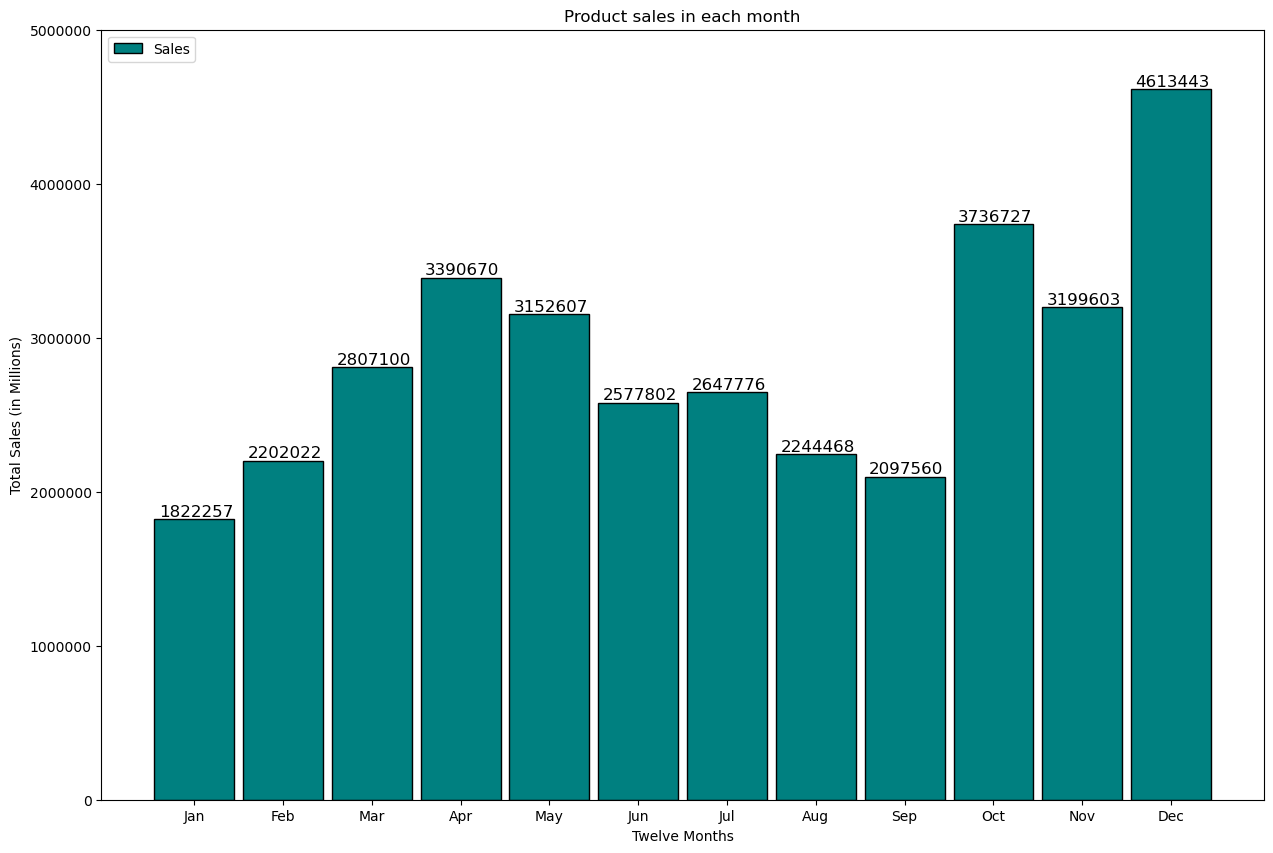

In [50]:
#Giving Figure Size
plt.figure(figsize=(15,10))

#For x-axis month range from 1 to 12
months = range(1, 13)

#For Y-axis
total_Sales_in_Each_Months =  newdf.groupby(['Month']).sum() 

#Title of Graph
plt.title("Product sales in each month")
plt.ticklabel_format(style='plain')

# Plotting bar graph
plt.bar(months, total_Sales_in_Each_Months['Sales'],edgecolor = "black", color = "teal", label="Sales", width= 0.9)
plt.legend(loc='upper left')
# X-axis Y-ticks
plt.xticks(months, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# X label 
plt.xlabel('Twelve Months')

# Y label
plt.ylabel('Total Sales (in Millions)')
plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000])

# To Display values on top of bars
for index, value in enumerate(total_Sales_in_Each_Months['Sales']):
    plt.text(index+0.6, value, str(round(value)), ha='left', va='bottom',fontsize = 12)

plt.show()


# Which city has sold the highest product?

####  <font color= brown> Finding out City with highest product sold </font> 

In [56]:
newdf2 = newdf.groupby('City').sum()
newdf2
max_quantity = newdf2['Quantity Ordered'].idxmax()
newdf_highest_sold_city = newdf2.loc[[max_quantity]]
newdf_highest_sold_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco,50239,8211461.74,315520,8262203.91


####  <font color= brown> Plotting bar graph to show which city has sold the highest product </font> 

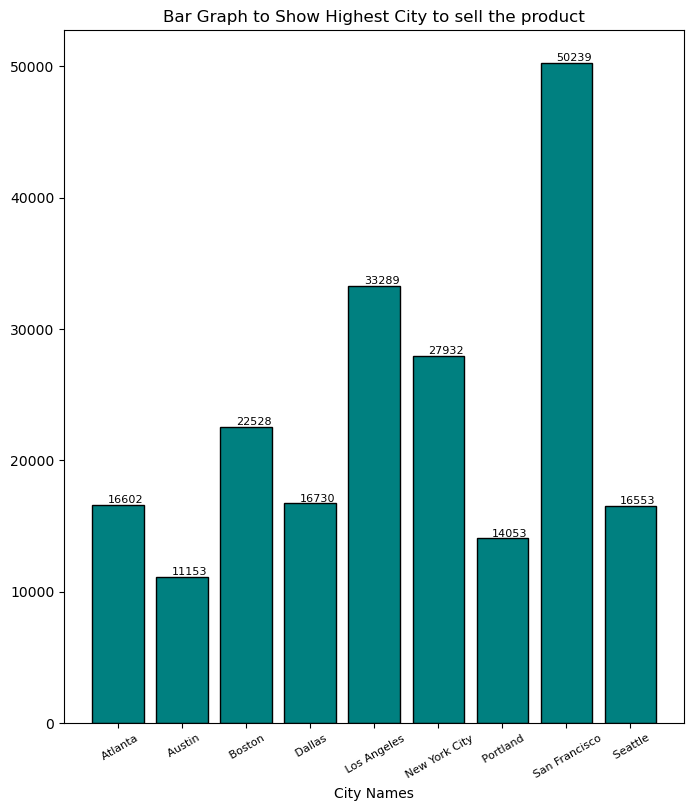

In [61]:
#Giving Figure Size
plt.figure(figsize=(8,9))
cities_name = [city for city, dframe in newdf.groupby('City')]

plt.ticklabel_format(style='plain')
plt.bar(cities_name, newdf2['Quantity Ordered'],edgecolor = "black", color = "teal")

# X label 
plt.xlabel('City Names')
plt.xticks(cities_name, rotation = 30,  size=8)

labels, location = plt.yticks()

#Title of Graph
plt.title('Bar Graph to Show Highest City to sell the product')

# Y label
plt.yticks([0,10000,20000,30000,40000,50000])

# To Display values on top of bars
for index, value in enumerate(newdf2['Quantity Ordered']):
    plt.text(index+0.4, value, str(round(value)),ha = 'right', va='bottom',fontsize = 8)
plt.show()

# Which product was sold the most in overall? Illustrate it through bar graph

In [34]:
newdf3 = newdf.groupby('Product').sum()
newdf3

,Quantity Ordered,Price Each,Month,Sales
Product,,,,
20in Monitor,4129,451068.99,29336,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56
27in FHD Monitor,7550,1125974.93,52558,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43
Flatscreen TV,4819,1440000.00,34224,1445700.00


####  <font color= brown> Showing which product was sold the most </font> 

In [35]:
max_sale = newdf3['Quantity Ordered'].idxmax()
newdf_max_sold_product = newdf3.loc[[max_sale]]
newdf_max_sold_product


,Quantity Ordered,Price Each,Month,Sales
Product,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83


####  <font color= brown> Plotting bar graph to show highest product sold </font> 

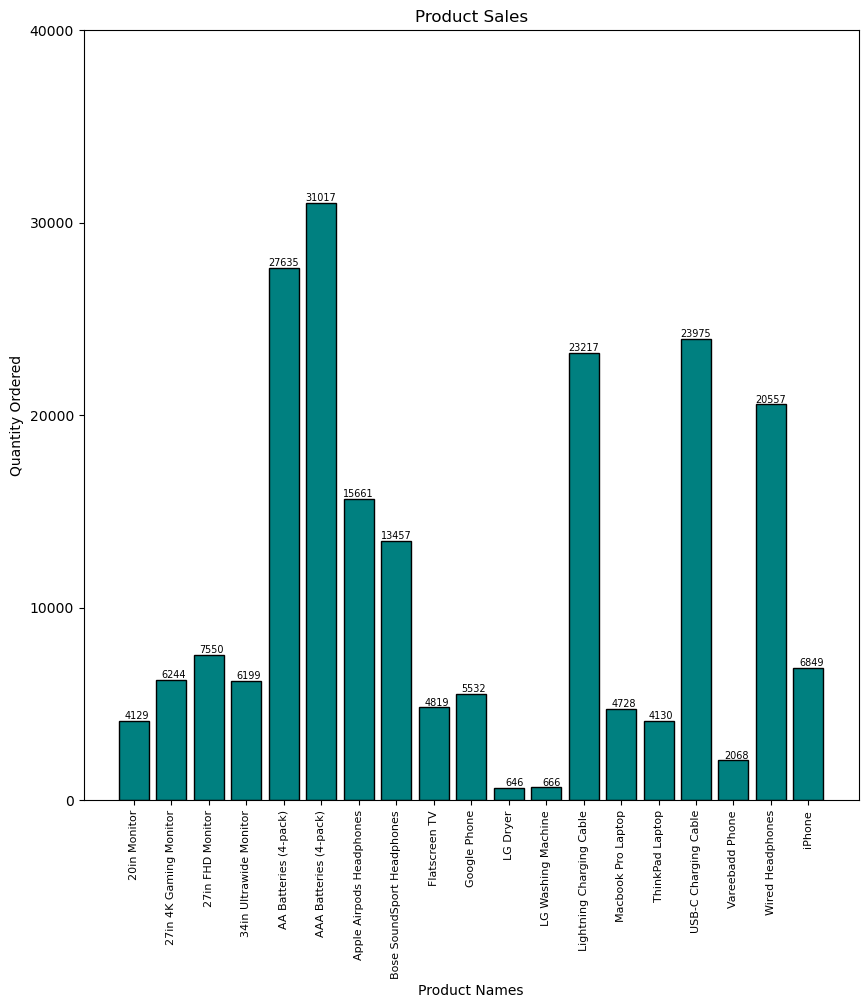

In [63]:
#Giving Figure Size
plt.figure(figsize=(10,10))
product_name = [product for product, dframe in newdf.groupby('Product')]
plt.ticklabel_format(style='plain')

#plotting bar using bar function from matplotlib
plt.bar(product_name, newdf3['Quantity Ordered'],edgecolor = "black", color = "teal")
plt.title('Product Sales')

#x-axis labels
plt.xlabel('Product Names')
plt.xticks(product_name, rotation = 'vertical',  size=8)
labels, location = plt.yticks()

# y-axis labels
plt.ylabel('Quantity Ordered')
plt.yticks([0,10000,20000,30000,40000])

#displaying data on top of bars
for index, value in enumerate(newdf3['Quantity Ordered']):
    plt.text(index+0.4, value, str(round(value)),ha = 'right', va='bottom',fontsize = 7)
    
plt.show()

# Write a Python program to show histogram plot of any chosen variables. Use proper labels in the graph.

####  <font color= brown> Creating Function to create histogram for any variable</font> 

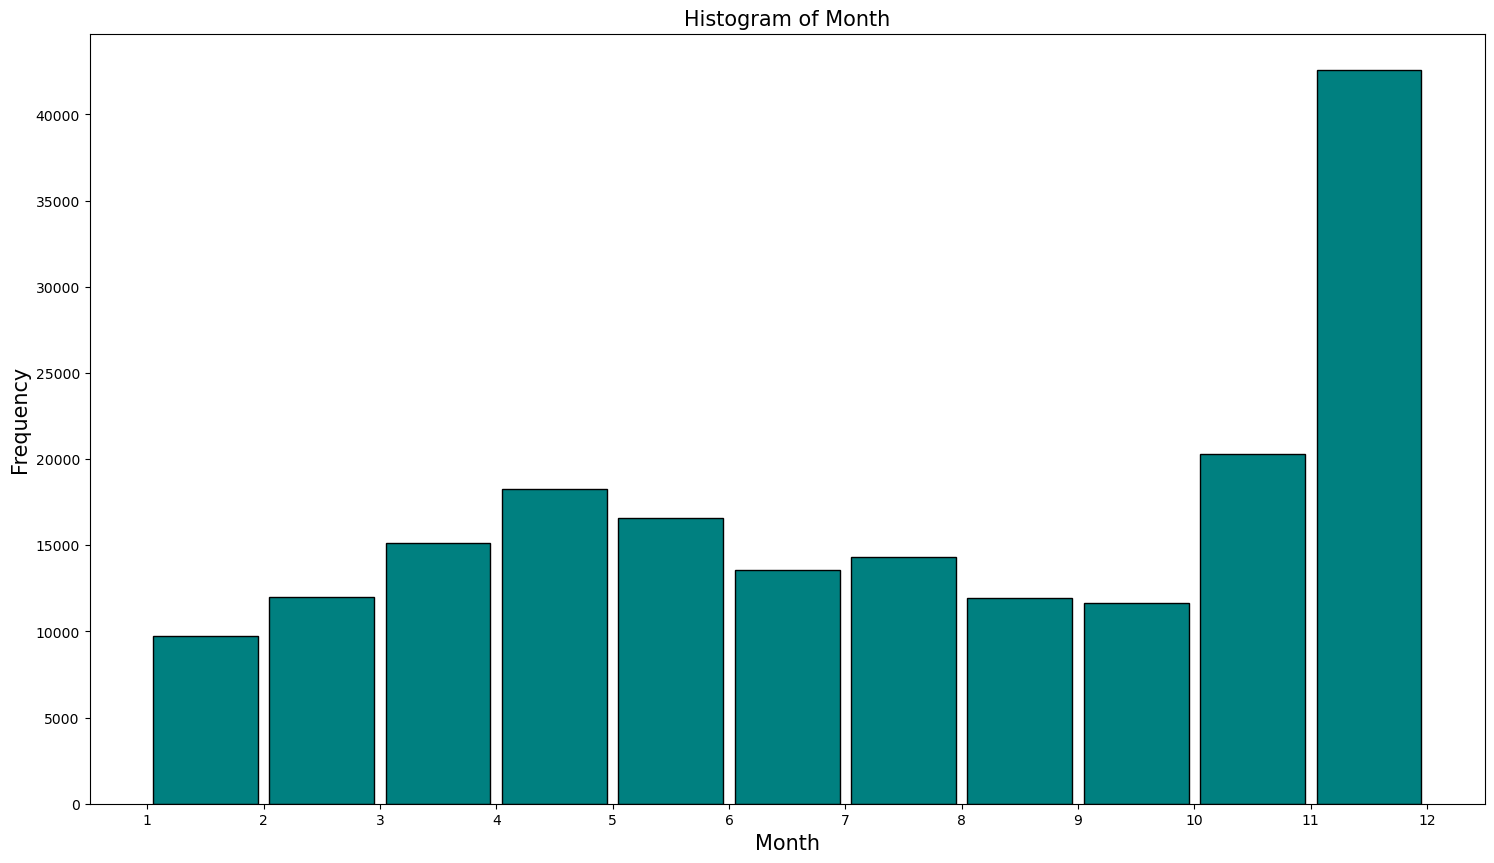

In [93]:

def plot_histogram(variable):
    
        # Giving Figure Size 
        plt.figure(figsize=(18,10))
 
        #Plotting histogram with all the labeling variables like color, edge color
        bins = plt.hist(newdf[f"{variable}"], bins= len(newdf[f"{variable}"].unique()) - 1,
                color="teal", edgecolor="black", rwidth = 0.9) 
       
        plt.xticks(bins[1])

        plt.ylabel('Frequency', fontsize = 15)
        plt.xlabel(f'{variable}',  fontsize = 15)
        plt.title(f'Histogram of {variable}',  fontsize = 15)

        plt.show()

plot_histogram("Month")